In [2]:
!pip install pandasql

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for pandasql: filename=pandasql-0.7.3-py3-none-any.whl size=26784 sha256=1c0100f789c93669b1104f5bd34a3648732521b653ea4ce65e6a894a3c4c4a58
  Stored in directory: /root/.cache/pip/wheels/5c/4b/ec/41f4e116c8053c3654e2c2a47c62b4fca34cc67ef7b55deb7f
Successfully built pandasql


In [39]:
import pandas as pd
import pandasql as ps
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
import xgboost as xgb

In [57]:
df = pd.read_csv("/content/drive/MyDrive/sklearn_project/output.csv")
names = []
for i in range(30):
  names.append("feature_x_"+str(i+1))
  names.append("feature_y_"+str(i+1))
names.append("Label")
df.columns =names
df.head()

,feature_x_1,feature_y_1,feature_x_2,feature_y_2,feature_x_3,feature_y_3,feature_x_4,feature_y_4,feature_x_5,feature_y_5,...,feature_y_26,feature_x_27,feature_y_27,feature_x_28,feature_y_28,feature_x_29,feature_y_29,feature_x_30,feature_y_30,Label
0,35.0,45.0,32.0,52.0,33.0,54.0,65.0,69.0,58.0,75.0,...,0,0,0,0,0,0,0,0,0,1
1,74.0,64.0,72.0,64.0,54.0,71.0,48.0,53.0,72.0,57.0,...,0,0,0,0,0,0,0,0,0,1
2,55.0,58.0,73.0,64.0,68.0,64.0,69.0,66.0,52.0,58.0,...,0,0,0,0,0,0,0,0,0,1
3,51.0,31.0,48.0,34.0,71.0,66.0,64.0,39.0,61.0,40.0,...,0,0,0,0,0,0,0,0,0,1
4,72.0,32.0,77.0,34.0,57.0,56.0,34.0,40.0,79.0,35.0,...,0,0,0,0,0,0,0,0,0,1


In [58]:
q1 = """SELECT count() FROM df where Label == 1  """

print(ps.sqldf(q1, locals()))

   count()
0    46134


In [59]:
q1 = """SELECT count() FROM df where Label == 0  """

print(ps.sqldf(q1, locals()))

   count()
0    59710


In [60]:
df = df.sample(frac=1).reset_index(drop=True)
x_train, x_test, y_train, y_test = train_test_split(df.iloc[:,:-1], df.iloc[:,-1], test_size=0.30, random_state=0)

In [61]:
pipe = make_pipeline(MinMaxScaler(), LogisticRegression(C= 1,max_iter=500))
pipe.fit(x_train, y_train) 
pipe.score(x_test, y_test) 

0.7673678906594444

In [80]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
clf = DecisionTreeClassifier(max_depth=20,min_samples_split=4)

# Train Decision Tree Classifer
clf = clf.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test)

print(accuracy_score(y_test, y_pred))

0.8678276752535113


In [81]:
print(y_pred)

[1 0 1 ... 0 1 1]


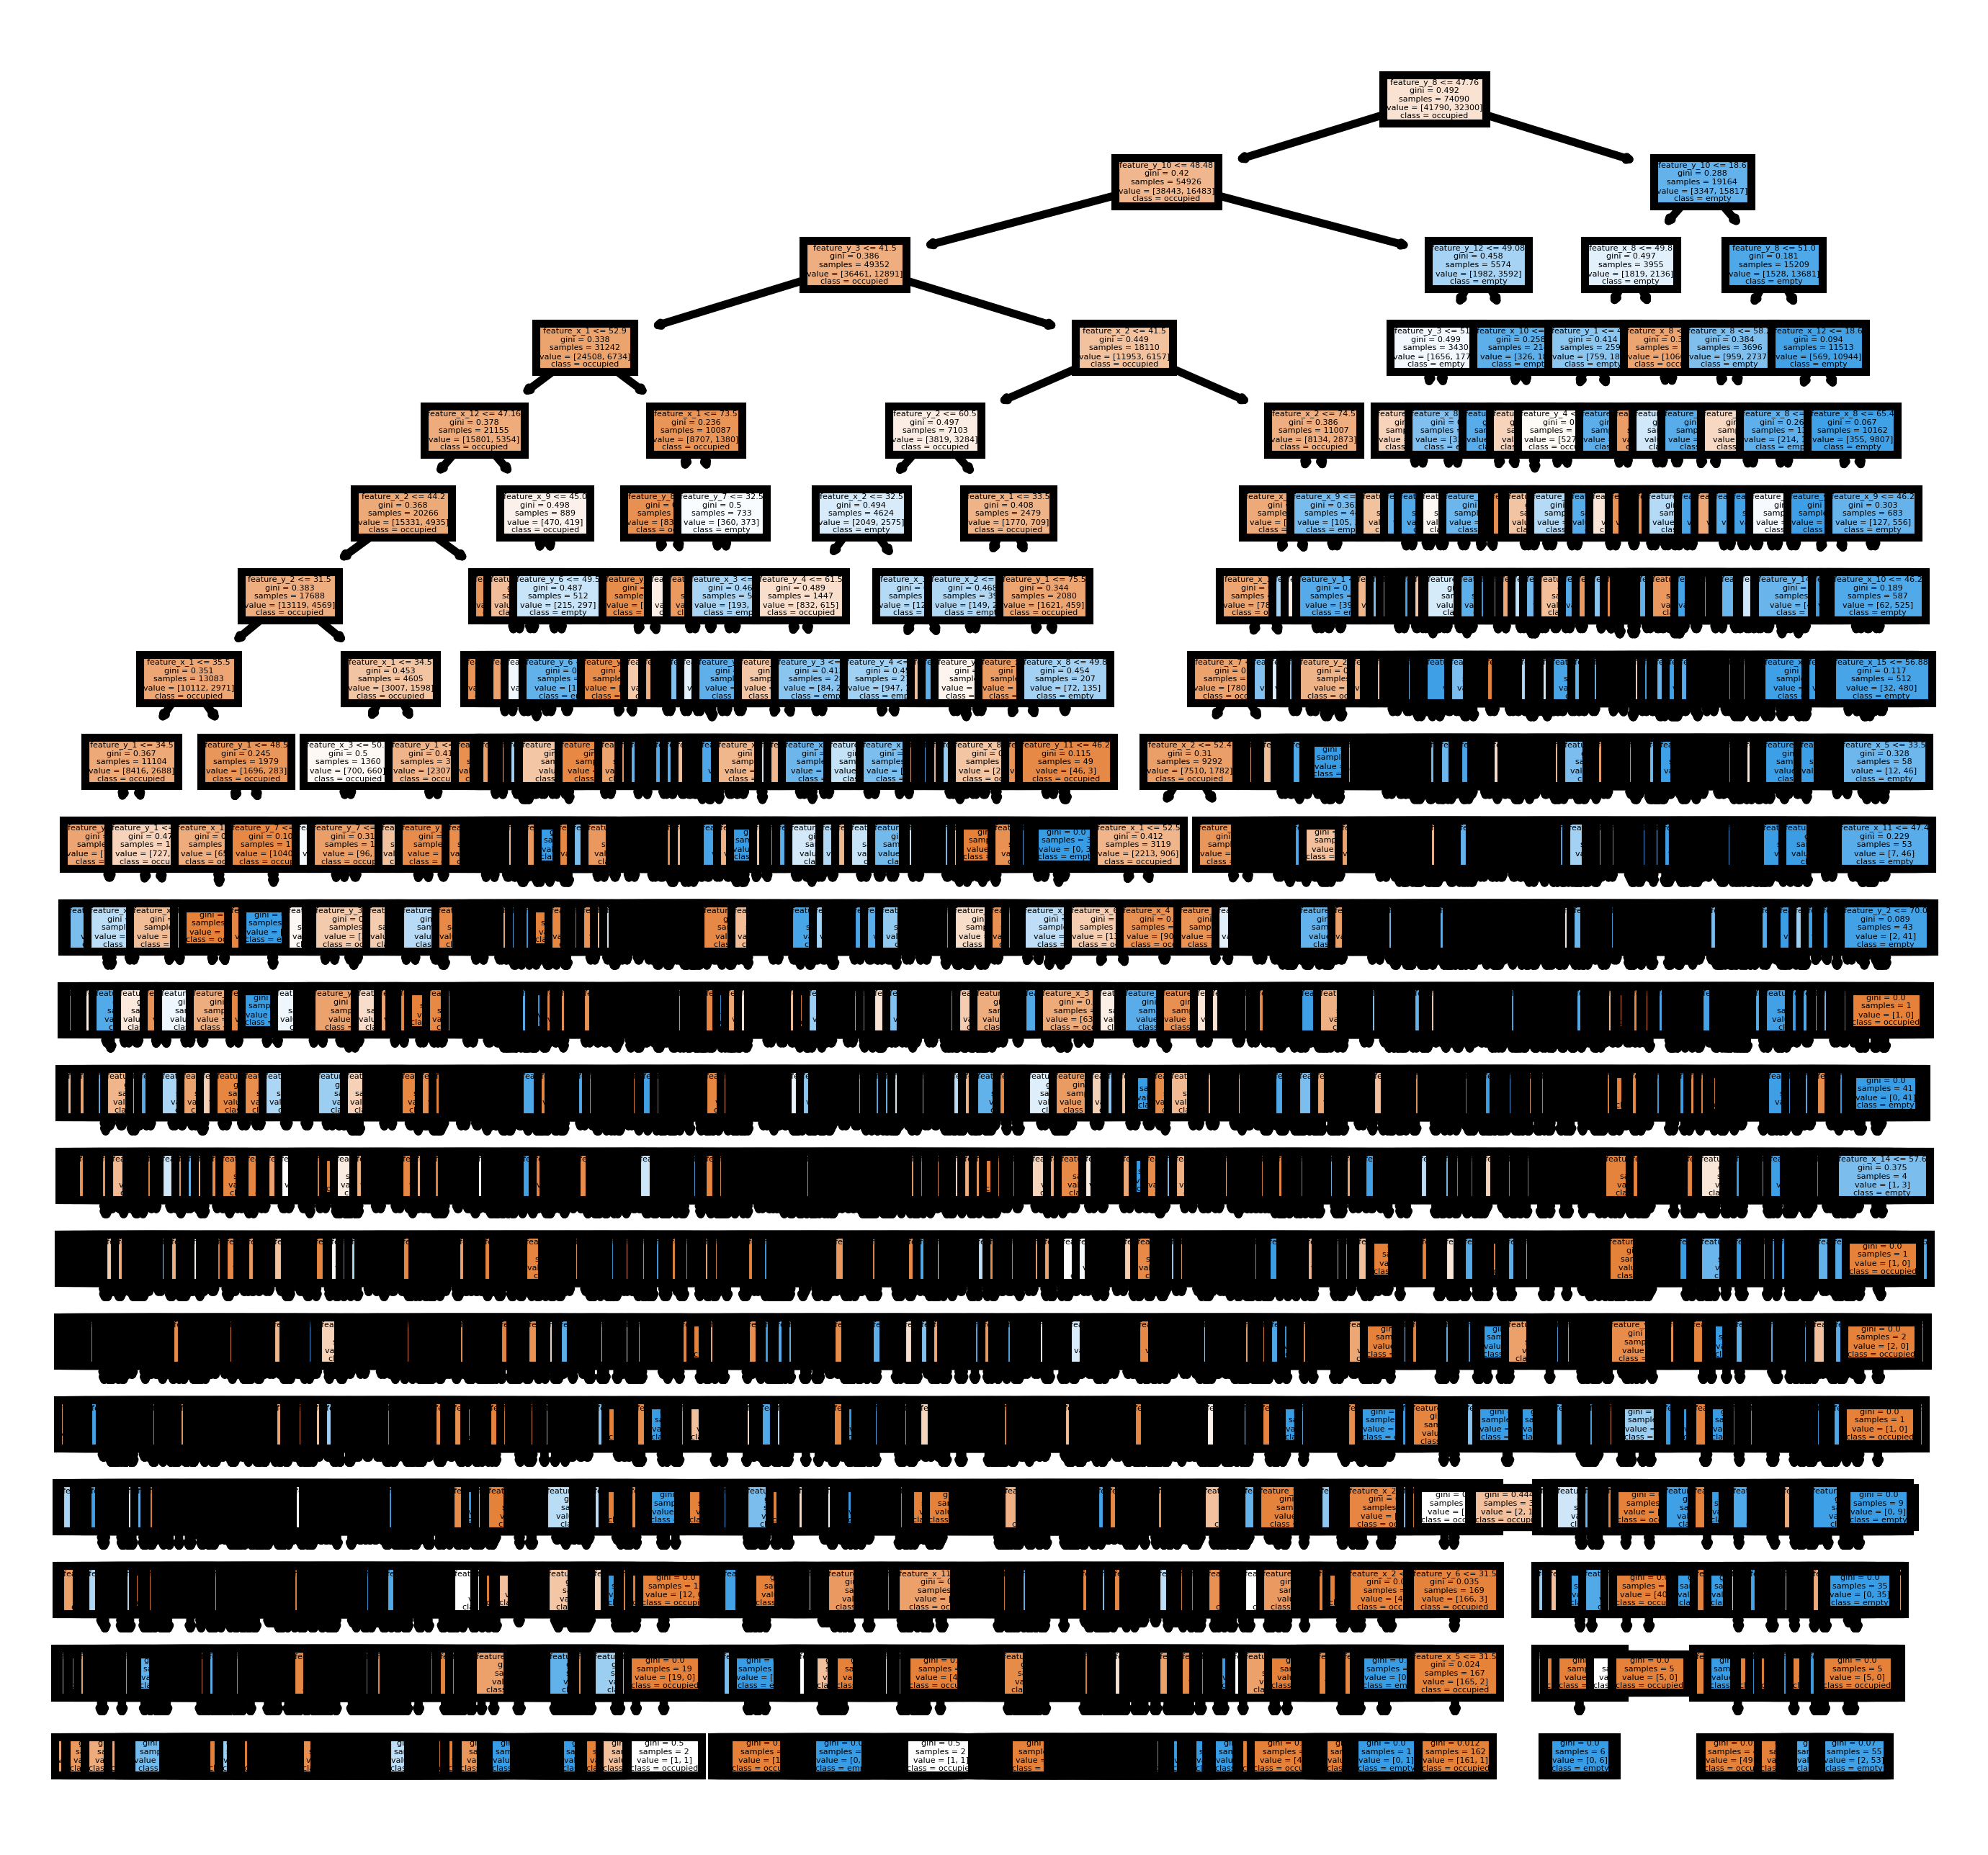

In [84]:
import matplotlib.pyplot as plt
fn=names[:-1]
cn=["occupied","empty"]
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
tree.plot_tree(clf,
               feature_names = fn, 
               class_names=cn,
               filled = True);
fig.savefig('rf_individualtree.png')

In [87]:
df_oneImage = pd.read_csv("/content/drive/MyDrive/sklearn_project/oneImageCSV.csv")

In [90]:
df_oneImage.columns =names
df_oneImage.head(100)

,feature_x_1,feature_y_1,feature_x_2,feature_y_2,feature_x_3,feature_y_3,feature_x_4,feature_y_4,feature_x_5,feature_y_5,...,feature_y_26,feature_x_27,feature_y_27,feature_x_28,feature_y_28,feature_x_29,feature_y_29,feature_x_30,feature_y_30,Label
0,40,78,48,66,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,33,54,32,52,31,47,31,64,31,61,...,0,0,0,0,0,0,0,0,0,1
2,46,57,54,65,51,60,55,63,68,69,...,0,0,0,0,0,0,0,0,0,1
3,71,71,67,69,72,36,46,61,69,66,...,0,0,0,0,0,0,0,0,0,1
4,48,49,55,42,66,67,36,37,77,41,...,0,0,0,0,0,0,0,0,0,1
5,43,49,62,48,53,53,37,46,69,59,...,0,0,0,0,0,0,0,0,0,1
6,46,45,66,51,72,50,69,49,59,44,...,0,0,0,0,0,0,0,0,0,1
7,72,55,73,51,70,53,31,36,75,48,...,0,0,0,0,0,0,0,0,0,1
8,57,37,60,47,58,43,79,42,58,48,...,0,0,0,0,0,0,0,0,0,1
9,32,34,37,36,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [92]:
test_oneImage = df_oneImage.iloc[:,:-1]
pred_oneImage_labels =clf.predict(test_oneImage)
pred_oneImage_labels

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1])

In [94]:
pd_result = pd.DataFrame(pred_oneImage_labels)
pd_result.head(100)

,0
0,0
1,1
2,1
3,1
4,1
5,1
6,1
7,1
8,1
9,1


In [96]:
pd_result.to_csv("/content/drive/MyDrive/sklearn_project/preds_oneimage.csv",header=False , index= False)